<a href="https://colab.research.google.com/github/b-paramesh/Logistic_Regression_Decision_Tree_Random_Forest/blob/main/Day_20_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
[[47  5]
 [ 2 26]]


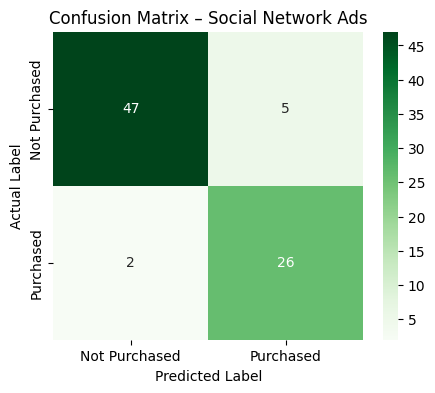

Accuracy: 0.9125


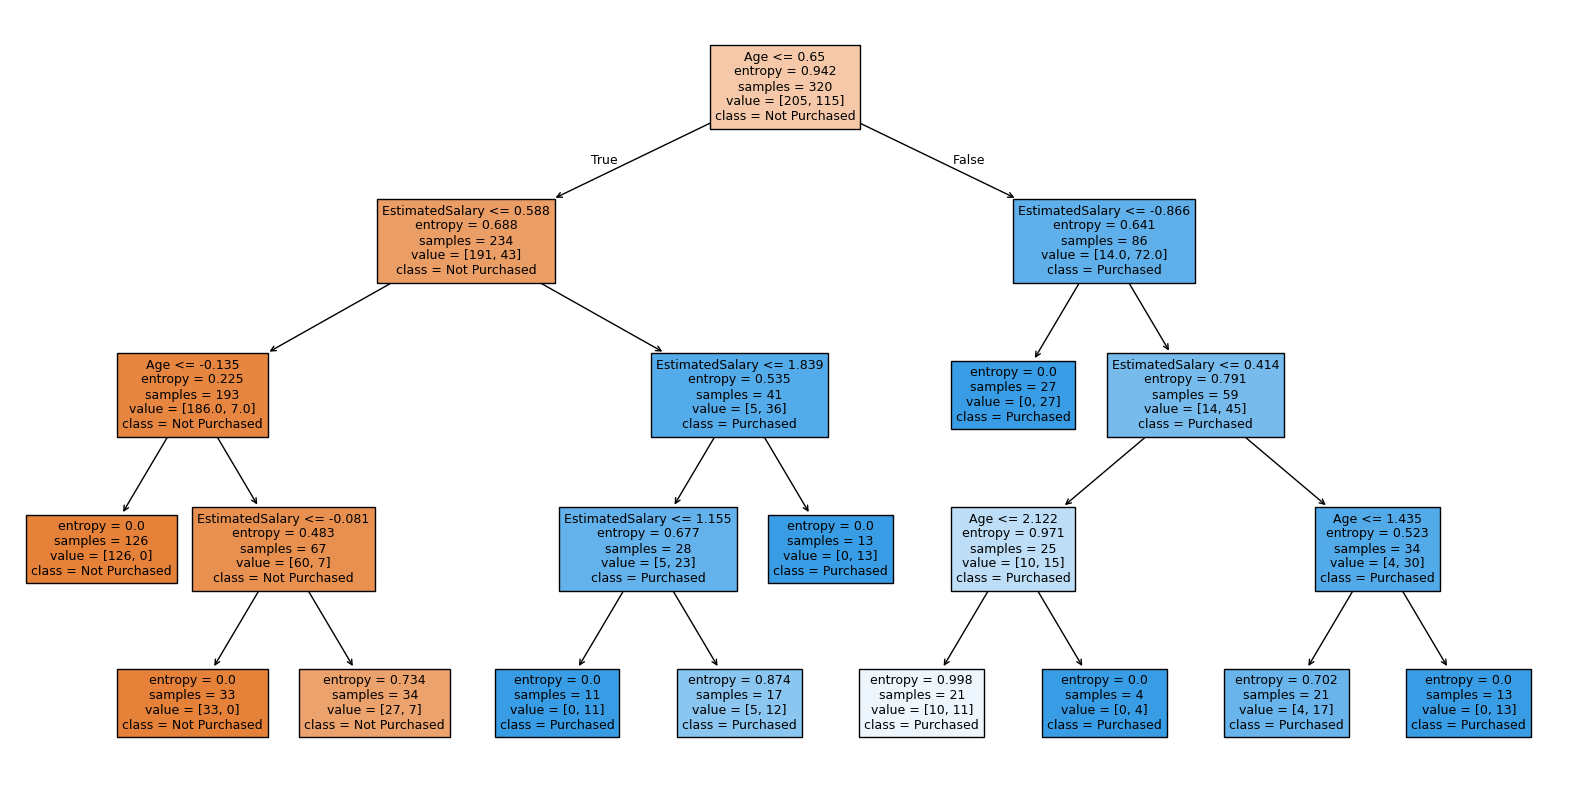

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv"
df = pd.read_csv(path)
print(df.head())

# Features and target
X = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree (Entropy)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion="entropy",
    random_state=0,
    max_depth=4
)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

# Confusion Matrix & Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Not Purchased', 'Purchased'],
    yticklabels=['Not Purchased', 'Purchased']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix – Social Network Ads')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))

# Decision Tree Visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    classifier,
    filled=True,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased']
)
plt.show()


/tmp/ipython-input-1225089503.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1225089503.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

GINI Confusion Matrix:
 [[86  2]
 [29 37]]
GINI Accuracy: 0.7987012987012987


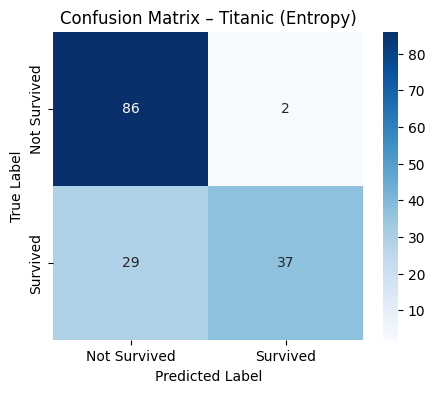

Entropy Accuracy: 0.7987012987012987


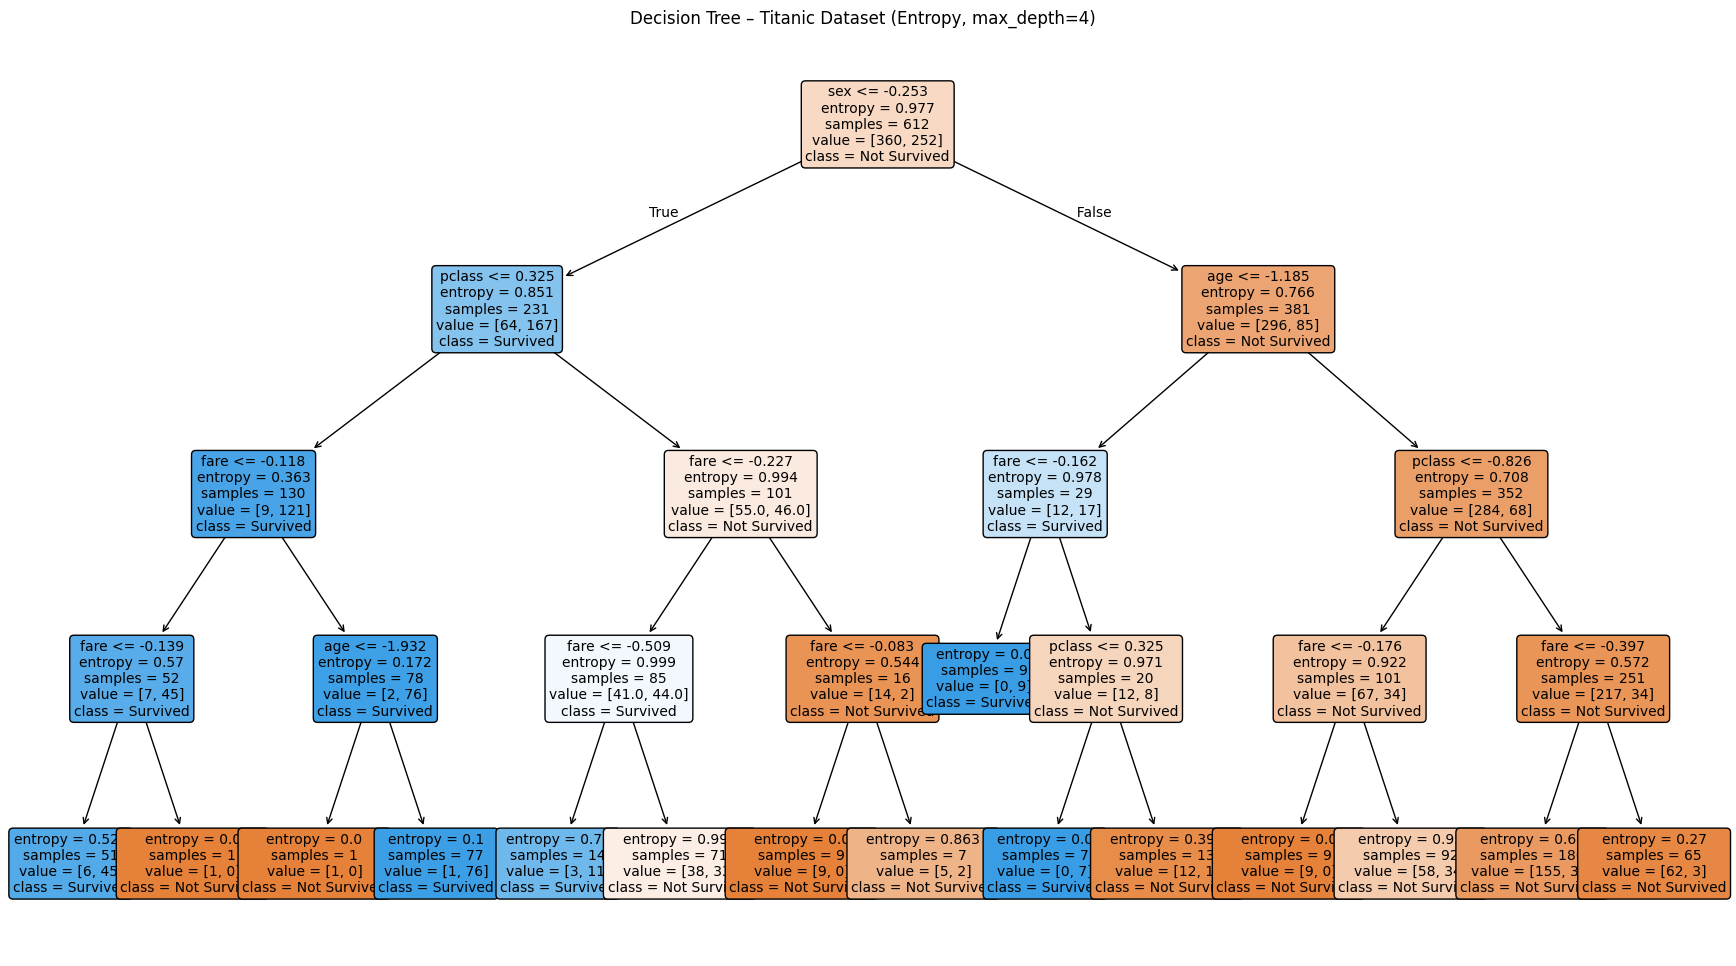

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Select required columns
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])

# Features & target
X = df.drop('survived', axis=1)
y = df['survived']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# =========================
# GINI DECISION TREE
# =========================
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(
    criterion="gini",
    random_state=0,
    max_depth=4
)
dt_gini.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("GINI Confusion Matrix:\n", cm_gini)
print("GINI Accuracy:", accuracy_score(y_test, y_pred_gini))

# =========================
# ENTROPY DECISION TREE
# =========================
dt_entropy = DecisionTreeClassifier(
    criterion="entropy",
    random_state=0,
    max_depth=4
)
dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

cm_entropy = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_entropy,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Titanic (Entropy)')
plt.show()

print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))

# Decision Tree Visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(22, 12))
plot_tree(
    dt_entropy,
    feature_names=['pclass', 'sex', 'age', 'fare', 'embarked'],
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree – Titanic Dataset (Entropy, max_depth=4)")
plt.show()
